# 02: Modeling and Evaluation

This notebook covers feature engineering, model training (using 4 models), evaluation, and results visualization for the Car Price Prediction project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Load and Prepare the Dataset

We'll load the  dataset and apply the same preprocessing steps from our EDA notebook to ensure consistency.

In [2]:
df = pd.read_csv('../data/CarPrice_Assignment.csv')

# Apply the same cleaning as in the EDA notebook
replacements = {
    'audi 100ls': 'audi 100 ls',
    'vw dasher': 'volkswagen dasher',
    'vw rabbit': 'volkswagen rabbit',
    'vokswagen rabbit': 'volkswagen rabbit',
    'vokswagen': 'volkswagen',
    'porcshce panamera': 'porsche panamera',
    'toyouta tercel': 'toyota tercel',
    'isuzu D-Max ': 'isuzu D-Max',
    'maxda rx3': 'mazda rx3',
    'maxda glc deluxe': 'mazda glc deluxe',
    'Nissan versa': 'nissan versa',
}
df['CarName'] = df['CarName'].replace(replacements)

## Feature Engineering

In [3]:
# Example: One-hot encoding categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('CarName')  # Optionally drop or encode CarName
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Data Splitting and Scaling

We'll split our data into training (80%) and test (20%) sets, then scale our features using StandardScaler to ensure all features are on the same scale for our models.

In [4]:
X = df.drop(['car_ID', 'CarName', 'price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

We'll train and compare 4 different models:
1. **Linear Regression** - Baseline model
2. **Random Forest** - Ensemble method, good for non-linear relationships
3. **Decision Tree** - Interpretable model
4. **XGBoost** - Advanced gradient boosting

We'll evaluate using RMSE, MAE, and R² metrics.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df

,RMSE,MAE,R2
Linear Regression,2912.388793,2089.382729,0.892557
Random Forest,1820.431169,1259.757695,0.958021
Decision Tree,2881.019326,1886.321146,0.894859
XGBoost,2279.700638,1573.949671,0.934168


## Visualize Model Performance

Let's visualize the error metrics and R² scores for each model.

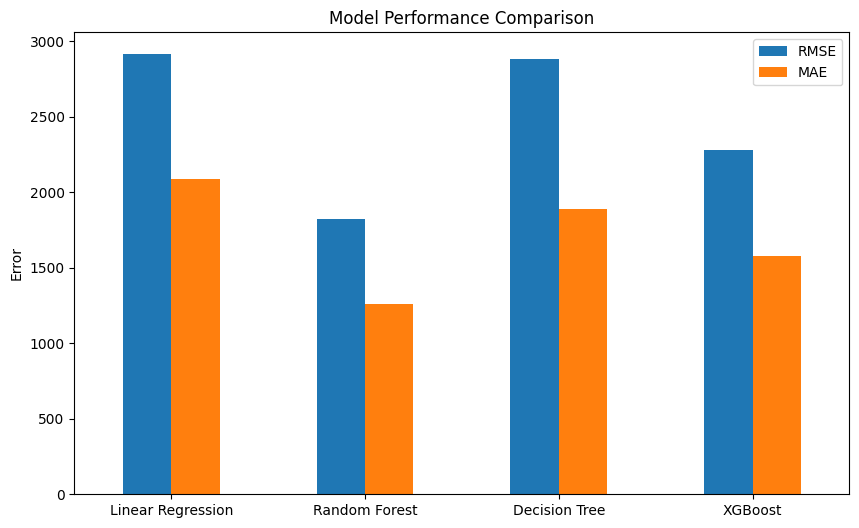

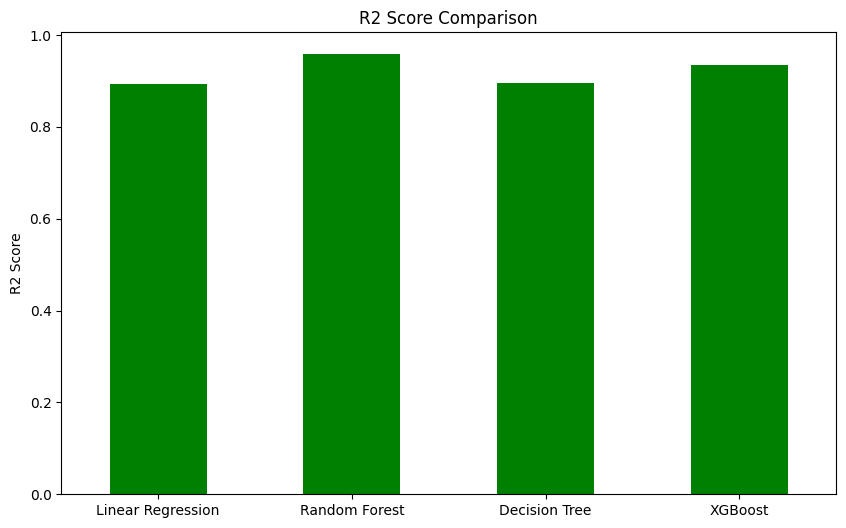

In [6]:
results_df[['RMSE', 'MAE']].plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xticks(rotation=0)
plt.show()

results_df['R2'].plot(kind='bar', figsize=(10,6), color='green')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=0)
plt.show()

## Conclusion and Next Steps

In this notebook, we compared several machine learning models for car price prediction, including:
- Linear Regression (baseline)
- Decision Tree
- Random Forest
- XGBoost

**Key findings:**
- Ensemble models (Random Forest, XGBoost) performed significantly better than simple linear and tree models.
- Feature engineering and proper preprocessing had a strong impact on model performance.